# SHAP Example for regression models

https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [1]:
import sklearn as sklearn
import shap as shap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from collections import defaultdict 

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
# a classic housing price dataset
#X, y = shap.datasets.california()
X, y = shap.datasets.california(n_points=1000)

# Linear Regression

In [3]:
# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

## Examining the model coefficients:

The most common way of understanding a linear model is to examine the coefficients learned for each feature. These coefficients tell us how much the model output changes when we change each of the input features:

In [4]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.43669
HouseAge = 0.00944
AveRooms = -0.10732
AveBedrms = 0.64507
Population = -0.0
AveOccup = -0.00379
Latitude = -0.42131
Longitude = -0.43451


# Get correlation based feature importance

In [5]:
correl_importance = {'Feature':[], 'Corr_Importance':[]}
for i, feat_name in enumerate(X.columns):
    feat_vec = X.iloc[:,i].to_numpy()
    label_vec = y
    corr_coeff = abs(np.corrcoef(x=feat_vec, y=label_vec)[0,1])
    correl_importance['Feature'].append(feat_name)
    correl_importance['Corr_Importance'].append(corr_coeff)
correl_importance_df = pd.DataFrame(correl_importance).sort_values(by='Corr_Importance',ascending=False)
correl_importance_df

,Feature,Corr_Importance
0,MedInc,0.688075
2,AveRooms,0.151948
6,Latitude,0.144160
1,HouseAge,0.105623
3,AveBedrms,0.046701
7,Longitude,0.045967
4,Population,0.024650
5,AveOccup,0.023737


<Axes: xlabel='Corr_Importance', ylabel='Feature'>

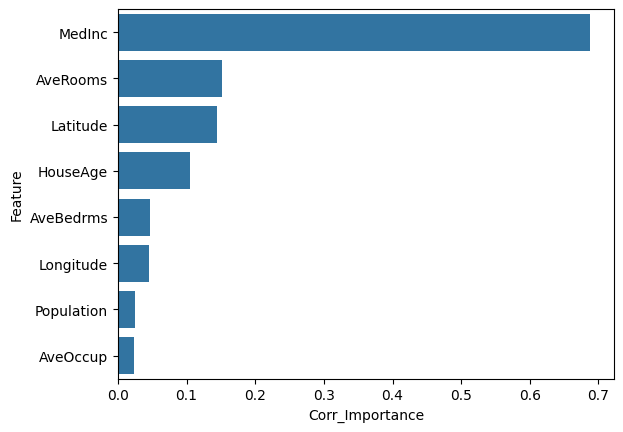

In [6]:
sns.barplot(data=correl_importance_df, x='Corr_Importance', y='Feature')

# For each feature, get the average Shapley value across all observations

In [7]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)

ExactExplainer explainer: 20641it [01:41, 177.94it/s]                           


In [8]:
display(X.columns)
display(np.mean(np.abs(shap_values.values), axis=0))
display(shap_values.values.shape)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

array([0.60413647, 0.1000006 , 0.12550267, 0.0950439 , 0.0027845 ,
       0.00275412, 0.84346112, 0.80913247])

(20640, 8)

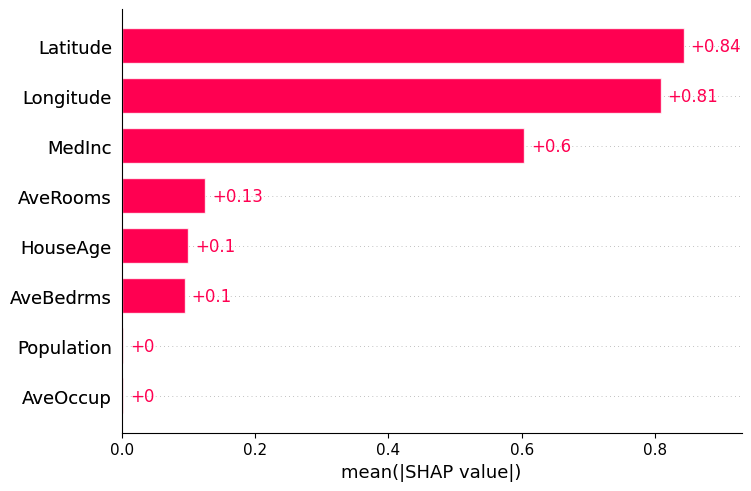

In [9]:
shap.plots.bar(shap_values)

# For each feature, get the Shapley value for the observation at index obs_idx

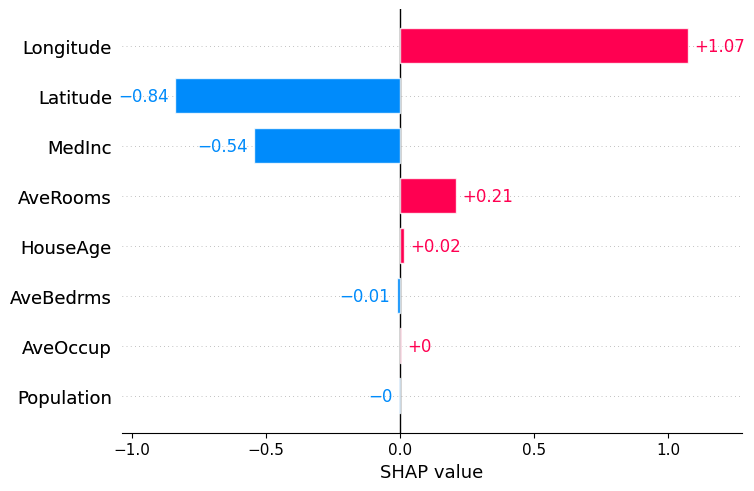

In [10]:
obs_idx = 100
shap.plots.bar(shap_values[obs_idx])

In [11]:
display(X.columns)
display(shap_values[obs_idx,:].values)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

array([-0.54441679,  0.01604082,  0.20862464, -0.01184117, -0.00371856,
        0.00434241, -0.83694101,  1.07298827])